# Assumptions for stats based regression

1. The model should be linear.
2. Residuals are normally distributed.
3. Homoscedastic model or equal variance of errors/residuals.
4. No autocorrelation in the errors/residuals.
5. No perfect multicollinearity. No linear relationship (high correlation) between independent variables.
6. Number of observations must be greater than the number of independent variables.
7. The values of independent variables must not be same.

In [24]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats as sms
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.stats.stattools import durbin_watson
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
# loading boston dataset
X = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
y = pd.DataFrame(load_boston().target, columns=["target"])

df_boston = pd.concat([X,y], axis=1)

df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
# scaling the dependent variables
ss = StandardScaler().fit(X)
X = pd.DataFrame(ss.transform(X), columns=X.columns)

# adding constant
Xc = sm.add_constant(X)

# OLS model
model = sm.OLS(y, Xc).fit()
y_pred = model.predict()

In [27]:
# model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          6.72e-135
Time:                        11:41:39   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.000      22.118      22.947
CRIM          -0.9281      0.282     -3.287      0.001      -1.483      -0.373
ZN             1.0816      0.320      3.382      0.001       0.453       1.710
INDUS          0.1409      0.421      0.334      0.738      -0.687       0.969
CHAS           0.6817      0.219      3.118      0.002       0.252       1.111
NOX           -2.0567      0.442     -4.651      0.000      -2.926      -1.188
RM             2.6742      0.293      9.116      0.000       2.098       3.251
AGE            0.0195      0.371      0.052      0.958      -0.710       0.749
DIS           -3.1040      0.420     -7.398      0.000      -3.928      -2.280
RAD            2.6622      0.577      4.613      0.000       1.528       3.796
TAX           -2.0768      0.633     -3.280      0.001      -3.321      -0.833
PTRATIO       -2.0606      0.283     -7.283      0.000      -2.617      -1.505
B              0.8493      0.245      3.467      0.001       0.368       1.331
LSTAT         -3.7436      0.362    -10.347      0.000      -4.454      -3.033
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1. Linearity of model

The relationship between dependent and independent variables must be linear. Order of the equation must be 1, non-exponential and no higher order values.

### How to check?

* Checking the shape of regression line by plotting using regplot. (Aditionally, you can also validate by plotting a scatter plot between the features and the target.)
* Rainbow test

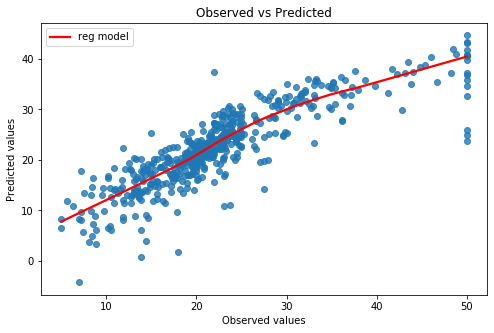

In [4]:
# plotting regression line using regplot
plt.figure(figsize=(8,5))
sns.regplot(x=y["target"], y=y_pred, lowess=True, line_kws={'color':'r','label':'reg model'})
plt.title("Observed vs Predicted")
plt.ylabel("Predicted values")
plt.xlabel("Observed values")
plt.legend()
plt.show()

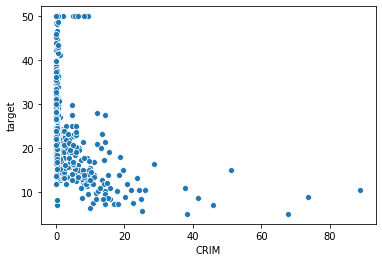

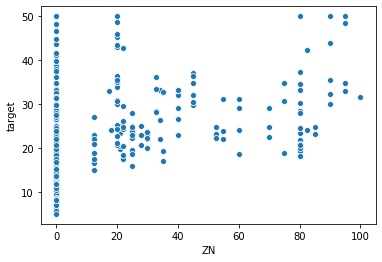

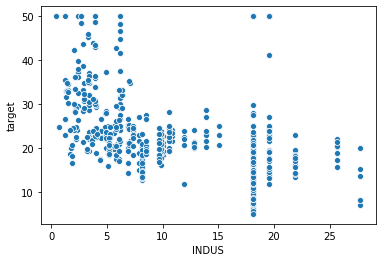

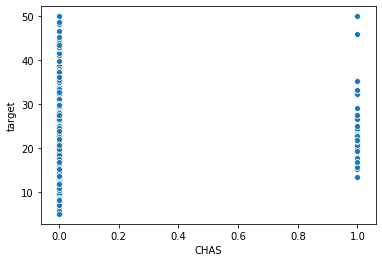

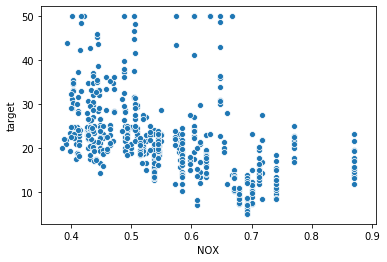

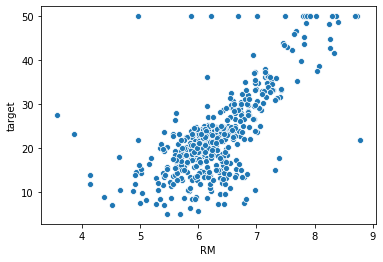

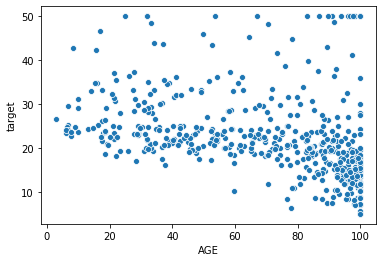

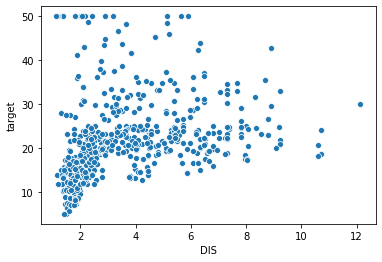

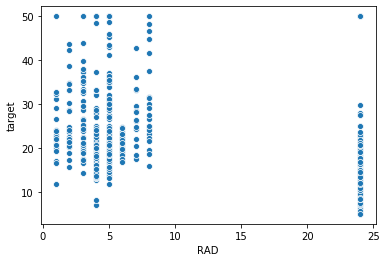

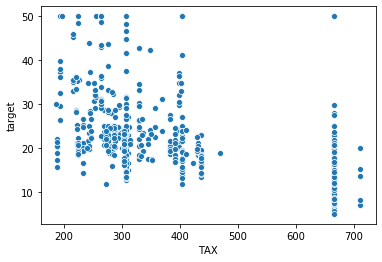

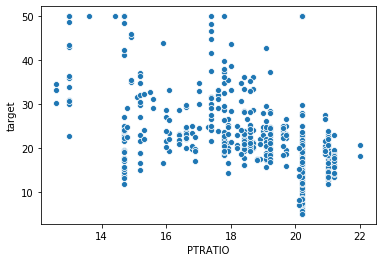

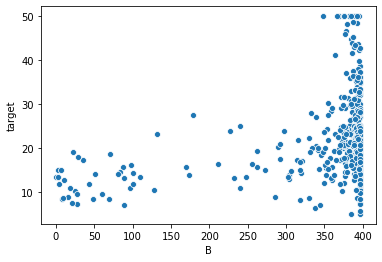

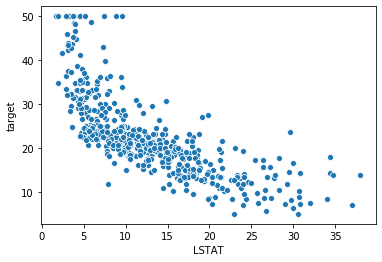

In [5]:
# scatterplots to visualize the relationship between dependent and independent variables
for col in list(X.columns):
    sns.scatterplot(data=df_boston, x=col, y="target")
    plt.show()

In [6]:
# rainbow-test for linearity
sm.stats.diagnostic.linear_rainbow(model, frac=0.5)

(0.5808507639614257, 0.999988852262534)

**Rainbow-test for linearity:**

Null Hypothesis (H0): The regression model is linear.

Alternate Hypothesis (H1): The regression model is not linear.

In [7]:
print("Null Hypothesis (H0):", sm.stats.diagnostic.linear_rainbow(model, frac=0.5)[1] > 0.05)

Null Hypothesis (H0): True


### Impacts of violation

* Overfitting
* Parameter estimates are unbiased
* Unreliable p-values

### Possible causes

* Non-linearity of data of continuous variables

### Methods to overcome

* Transform the data (variable) from non-linear to linear using various data transformation techniques

## 2. Normality of residuals

Residuals must follow normal distribution.

### How to check?

* Visualizing the normality using QQ plot
* Hupothesis testing for normality using Jarque-Bera test

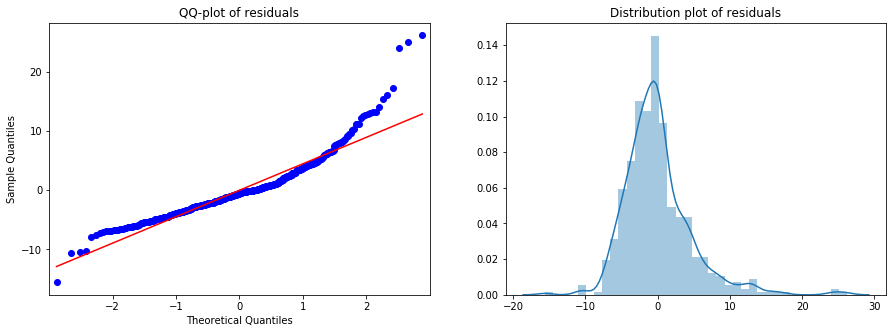

In [8]:
# visualizing the normality of residuals using QQ plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
sm.qqplot(model.resid, line='r', ax=ax[0])
sns.distplot(model.resid, ax=ax[1])
ax[0].set_title("QQ-plot of residuals")
ax[1].set_title("Distribution plot of residuals")
plt.show()

In [9]:
# hypothesis testing using jarque-bera test
stats.jarque_bera(model.resid)

# NOTE: can also get this value from summary of OLS model

(783.1262780507673, 0.0)

**Jarque-Bera test for normality of residuals:**

Null Hypothesis (H0) : The data is normally distributed.

Alternate Hypothesis (H1) : The data is not normally distributed.

In [10]:
print("Null hypothesis (H0) - Residuals are normally distributed:", stats.jarque_bera(model.resid)[1] > 0.05)

Null hypothesis (H0) - Residuals are normally distributed: False


### Impact of violation

* Parameter estimates are unbiased
* p-values are unreliable

### Possible causes

* Non-linearity in the dependent or independent variables
* Outliers in the variables
* Presence of bias that is explainable by ommited variables

### Methods to overcome

* Treat outliers present
* Transform the non-linear dependent or independent variables
* Include variables that explain the bias (non-normality) of the residuals

## 3. Homoscedasticity

Homoscedasticity describes a situation where the error term is same across all values of independent variable. There should be no clear pattern in the distribution of residuals and if there is a specific pattern,the data is heteroscedastic.

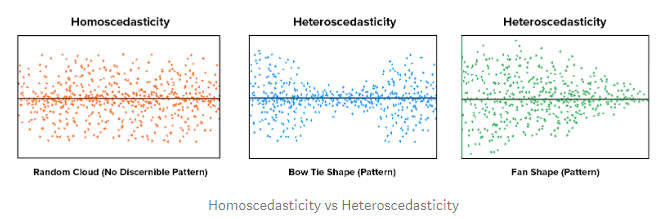

### How to check?

* Scatter plot of residual values vs predicted values
* Goldfeld-Quandt test

In [11]:
# # scatter plot of residual values vs predicted values
# # !pip install yellowbrick
# from yellowbrick.regressor import ResidualsPlot

# model = LinearRegression()
# visualizer = ResidualsPlot(model)
# visualizer.fit(Xc, y)
# visualizer.score(Xc, y)
# visualizer.show()

### This will work only for regressor model, not OLS

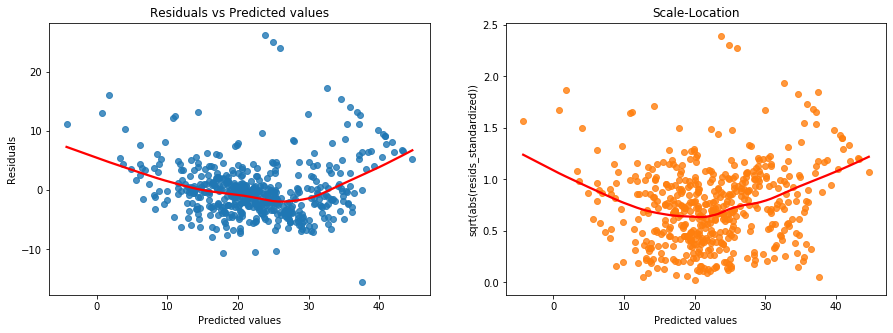

In [12]:
# scatter plot of residual values vs predicted values

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.regplot(y_pred, model.resid, lowess=True, line_kws={'color':'r'}, ax=ax[0])
ax[0].set_title("Residuals vs Predicted values")
ax[0].set_xlabel("Predicted values")
ax[0].set_ylabel("Residuals")

resids_standardized = model.get_influence().resid_studentized_internal
sns.regplot(y_pred, np.sqrt(np.abs(resids_standardized)), lowess=True, line_kws={'color':'r'}, ax=ax[1])
ax[1].set_title("Scale-Location")
ax[1].set_xlabel("Predicted values")
ax[1].set_ylabel("sqrt(abs(resids_standardized))")

plt.show()

In [13]:
# hypothesis testing using goldfeld test
sms.api.het_goldfeldquandt(model.resid, model.model.exog)

(2.4311473253497464, 7.302071915608556e-12, 'increasing')

**Goldfeld-Quandt test for Homoscedasticity:**

Null Hypothesis (H0): The data is Homoscedastic.

Alternate Hypothesis (H1): The data is not Homoscedastic.

In [15]:
print("Null hypothesis (H0):", sms.api.het_goldfeldquandt(model.resid, model.model.exog)[1] > 0.05)

Null hypothesis (H0): False


### Impact of violation

* Parameter estimates are unbiased
* p-values are unreliable

### Possible causes

* Outliers in the independent variables
* Repeating trend/pattern in dependent variable, i.e. time series

### Methods to overcome

* Transform (log) the dependent or independent variables
* In case of time series, deflating a series if it concerns monetary value

## 4. Autocorrelation in residuals

Autocorrelation occurs when the residual errors are dependent on each other. This usually occurs in time series models where the next instant is dependent on previous instant.

### How to check?

* Autocorrelation Function (ACF) plots
* Durbin-Watson test

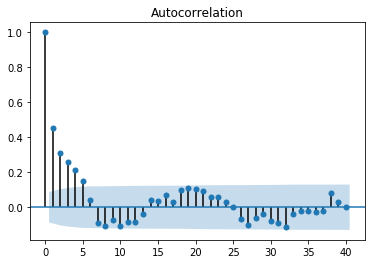

In [16]:
# autocorrelation function (ACF) plot
acf = smt.graphics.plot_acf(model.resid, lags=40, alpha=0.05)
plt.show()

In [17]:
# durbin-watson test
durbin_watson(model.resid)

1.0783751186797235

Test results of Durbin-Watson test:
* the test statistic always has a value between 0 and 4
* value of 2 means that there is no autocorrelation in the sample
* values < 2 indicate positive autocorrelation, values > 2 negative one

In [28]:
if durbin_watson(model.resid) == 2:
    print("The value is", durbin_watson(model.resid), ", there is no autocorrelation.")
elif durbin_watson(model.resid) < 2:
    print("The value is", durbin_watson(model.resid), ", there is positive autocorrelation.")
else:
    print("The value is", durbin_watson(model.resid), ", there is negative autocorrelation.")

The value is 1.078375118679725 , there is positive autocorrelation.


### Impact of violation

* Parameter estimates are biased

### Possible causes

* Misspecified mode
* Violation of linearity assumption
* Presence of bias that is explainable by ommited variables

### Methods to overcome

* Include variables that can explain the bias
* Use Generalize Least Squares (GLS) model
* If DW < 1 it might indicate a possible problem in model specification, consider stationarizing time-series variables by differencing, logging, and/or deflating (in case of monetary values)
* In case of significant negative correlation, some of the variables might have been overdifferenced

## 5. Multicollinearity among independent variables

Multicollinearity is a state of very high inter-correlations among the independent variables. However, when features are correlated, changes in one feature in turn shifts another feature/features. The stronger the correlation, the more difficult it is to change one feature without changing another. It becomes difficult for the model to estimate the relationship between each feature and the target independently because the features tend to change in unison. In such cases, small changes in independent variables causes large changes in dependent variable.

### How to check?

* Correlation matrix (heatmap)
* Variance Inflation Factor (VIF)

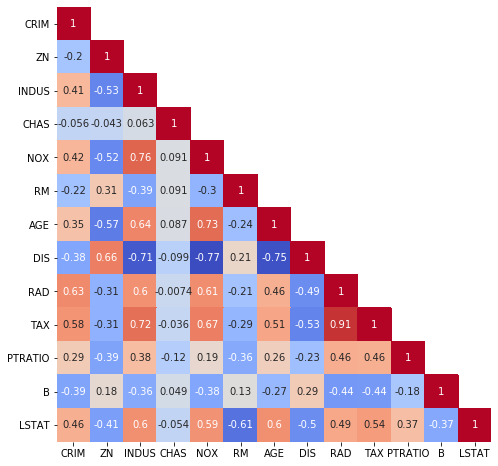

In [29]:
# correlation matrix of independent variables
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", square=True, mask=np.triu(X.corr(),1), cbar=False)
plt.show()

In [20]:
# calculating VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({"VIF":vif}, index=X.columns).sort_values("VIF", ascending=False)

,VIF
PTRATIO,85.029547
RM,77.948283
NOX,73.894947
TAX,61.227274
AGE,21.386850
B,20.104943
RAD,15.167725
DIS,14.699652
INDUS,14.485758
LSTAT,11.102025


**Interpretation of VIF:**

The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable is added to the linear regression. If no features are correlated, then all values for VIF will be 1. If VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this. A rule of thumb for removal could be VIF larger than 10 (5 is also common).

To deal with multicollinearity we should iteratively remove features with high values of VIF.

### Impact of violation

* Small changes in independent variables causes large and wild changes in dependent variable.
* The estimates will be less precise and highly sensitive to particular sets of data.
* Estimates of the coefficients become unstable and the standard errors for the coefficients can get wildly inflated.

### Possible causes

* When we use dummy variables to encode a categorical feature and do not omit the baseline level from the model.
* When there are redundant variables in our model.
* When the one or more independent variables are correlated with one or more other independent variables.

### Methods to overcome

* Remove statistically redundant variables.
* Use PCA to reduce features to a smaller set of uncorrelated components.